Nama : Avrilia Viananda Nagita

NIM : 2311110010

Kelas : SD 04 01

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score

# **EDA**

In [2]:
data = pd.read_csv('Dataset-Tugas.csv')

In [3]:
data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.isnull().sum()

,0
sepal length,0
sepal width,0
petal length,0
petal width,0
class,0


In [6]:
data.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# **PREPROCESSING**

In [7]:
data.drop(['class'], axis=1, inplace=True)
data.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


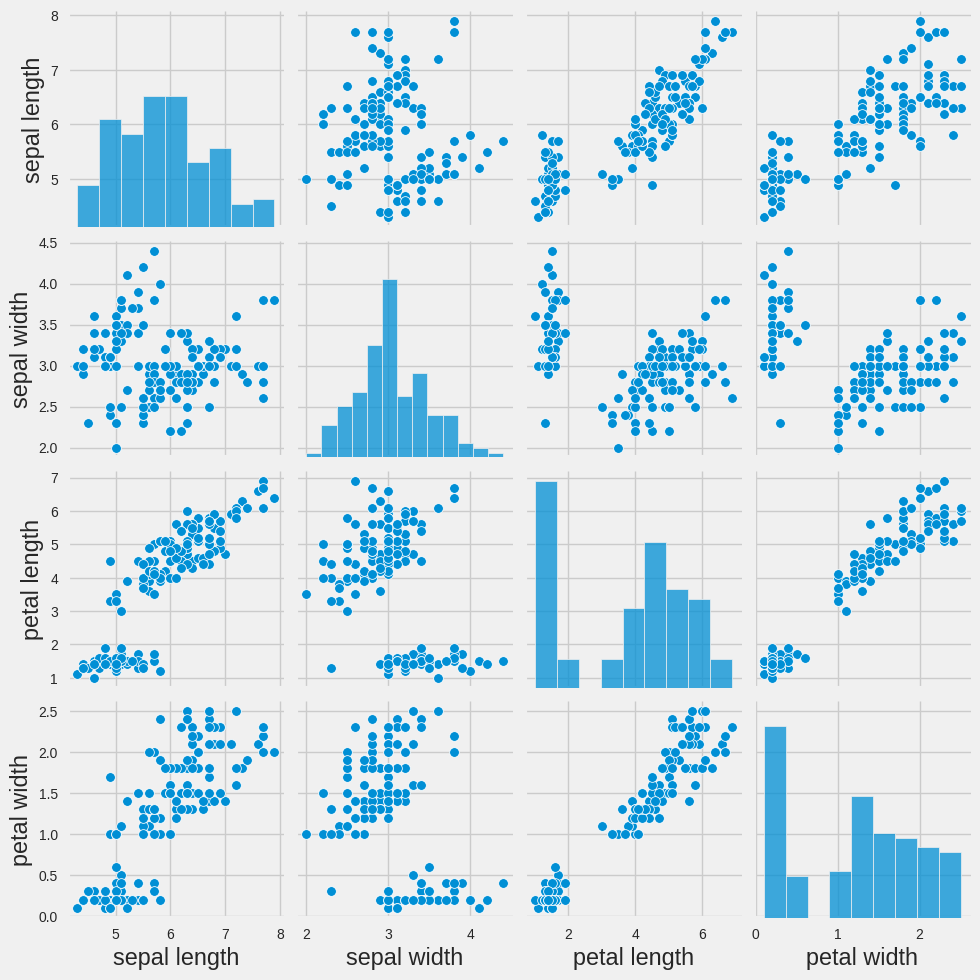

In [8]:
# Visualisasi distribusi data
sns.pairplot(data)
plt.show()

Dari plot ini,  bahwa petal length dan petal width memiliki korelasi yang kuat.
Titik-titik data cenderung membentuk garis diagonal yang naik dari kiri bawah ke kanan atas.
sepal length dan sepal width juga memiliki korelasi, meskipun lebih lemah.
petal width dan sepal width tidak menunjukkan korelasi yang signifikan.

In [20]:
# Normalisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
print(data_scaled)

[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00
   6.69306510e-01 -2.97897315e-01]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00
   2.02600889e+00 -2.97897315e-01]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00
   2.02600889e+00 -2.97897315e-01]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00
   2.02600889e+00 -2.97897315e-01]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00
   6.69306510e-01 -2.97897315e-01]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00
   6.69306510e-01 -2.97897315e-01]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00
   6.69306510e-01 -2.97897315e-01]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00
   6.69306510e-01 -2.97897315e-01]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00
   2.02600889e+00 -2.97897315e-01]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00
   2.02600889e+00 -2.9789

# **K-MEANS**

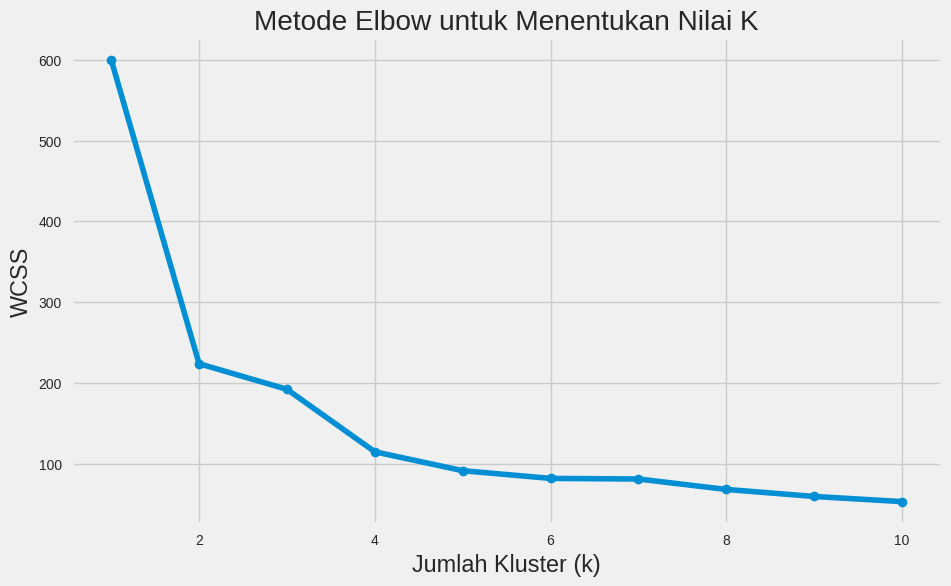

In [24]:
# Memilih fitur yang akan digunakan untuk clustering
features = data[['sepal length', 'sepal width', 'petal length', 'petal width']]

# Standarisasi fitur
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Menentukan nilai k dengan metode elbow
wcss = []  # Within-cluster sum of squares
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Membuat diagram elbow
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Metode Elbow untuk Menentukan Nilai K')
plt.xlabel('Jumlah Kluster (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

Berdasarkan diagram elbow, nilai K optimal untuk algoritma k-means clustering berada di sekitar 4, karena pada titik tersebut, penurunan WCSS mulai berkurang secara signifikan.

   sepal length  sepal width  petal length  petal width  Label_K-Means
0           5.1          3.5           1.4          0.2              1
1           4.9          3.0           1.4          0.2              2
2           4.7          3.2           1.3          0.2              2
3           4.6          3.1           1.5          0.2              2
4           5.0          3.6           1.4          0.2              1
Centroid dari setiap kluster:
   sepal length  sepal width  petal length  petal width  Label_K-Means
0      6.314583     2.895833      4.973958     1.703125              0
1      5.178125     3.631250      1.496875     0.278125              1
2      4.754545     2.904545      1.745455     0.336364              2


<ipython-input-48-e930808e1089>:37: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c=scatter.cmap(scatter.norm(i)), label=f'Cluster {i}')


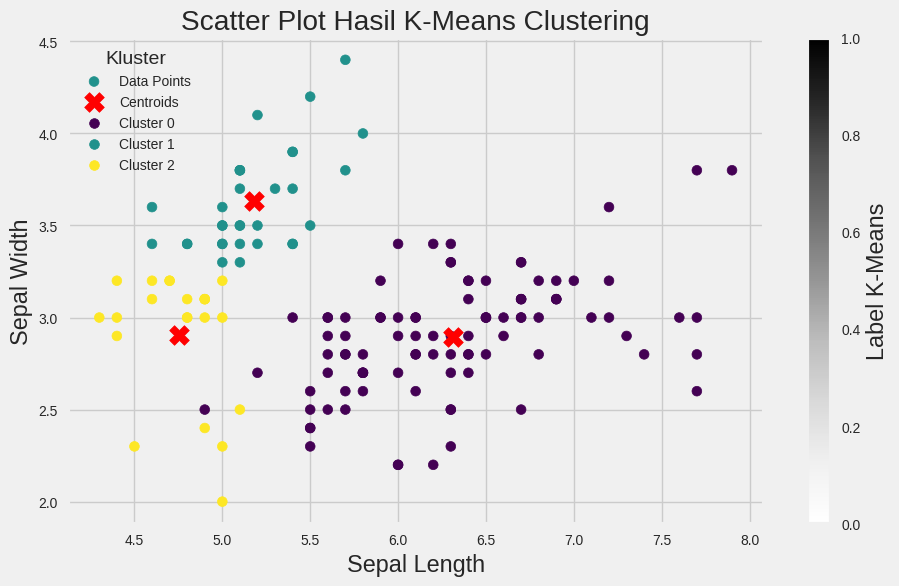

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standarisasi fitur
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['sepal length', 'sepal width', 'petal length', 'petal width']])

# Dari diagram elbow, pilih nilai k yang sesuai (misalnya k=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Label_K-Means'] = kmeans.fit_predict(scaled_features)

# Menampilkan hasil label
print(data[['sepal length', 'sepal width', 'petal length', 'petal width', 'Label_K-Means']].head())

# Menampilkan centroid
centroids = scaler.inverse_transform(kmeans.cluster_centers_)  # Mengembalikan ke skala asli
centroid_df = pd.DataFrame(centroids, columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
centroid_df['Label_K-Means'] = range(optimal_k)  # Menambahkan label kluster

print("Centroid dari setiap kluster:")
print(centroid_df)

# Membuat scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['sepal length'], data['sepal width'], c=data['Label_K-Means'], cmap='viridis', label='Data Points')
centroids_plot = plt.scatter(centroid_df['sepal length'], centroid_df['sepal width'], c='red', marker='X', s=200, label='Centroids')

# Menambahkan keterangan untuk setiap kluster
for i in range(optimal_k):
    plt.scatter([], [], c=scatter.cmap(scatter.norm(i)), label=f'Cluster {i}')

plt.title('Scatter Plot Hasil K-Means Clustering')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.colorbar(label='Label K-Means')
plt.legend(title='Kluster')
plt.grid(True)  # Menampilkan grid pada plot
plt.show()

Grafik menunjukkan hasil clustering dengan 3 kluster.
Setiap titik data diklasifikasikan ke dalam salah satu kluster, ditunjukkan dengan warna yang berbeda.
Tiga titik pusat kluster ditunjukkan dengan tanda silang merah.
Grafik menampilkan hubungan antara dua variabel: Sepal Length (Panjang Sepal) dan Sepal Width (Lebar Sepal).

# **DBSCAN**

In [30]:
# Membuat objek DBSAN dnegan parameter epsilon dan jumlah minimum sampel
model2 = DBSCAN(eps=1, min_samples=5)

# Melakukan clustering pada data
model2.fit(data_scaled)

# Mendapatkan label untuk setiap data (-1 menandakan noise)
y_pred2 = model2.labels_
y_pred2

array([ 0,  1,  1,  1,  0,  0,  0,  0,  1,  1,  0,  0,  1,  1, -1, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  1,  0,  0,  0,  1,  1,  0, -1, -1,
        1,  1,  0,  1,  1,  0,  0, -1,  1,  0,  0,  1,  0,  1,  0,  0,  2,
        2,  2,  2,  2,  2, -1, -1,  2, -1, -1,  2,  3,  2,  2,  2,  2,  2,
        3,  2,  2,  2,  3,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
       -1,  2,  3,  2,  2,  2,  2,  2, -1,  2,  2,  2,  2, -1,  2, -1,  2,
        2,  2,  2,  4, -1,  4,  3, -1,  2,  2,  2,  2, -1,  2,  2, -1,  4,
        3,  2,  2,  4,  2,  2,  4,  2,  2,  2,  4,  4, -1,  2,  2,  2,  4,
       -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1,  2])

In [32]:
# Tambahkan label tersebut menjadi kolom baru didataset
data['Hasil_Clustering'] = model2.labels_
data.head()

,sepal length,sepal width,petal length,petal width,Label_K-Means,Label_DB-Scan,Hasil_Clustering
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,2,1,1
2,4.7,3.2,1.3,0.2,2,1,1
3,4.6,3.1,1.5,0.2,2,1,1
4,5.0,3.6,1.4,0.2,1,0,0


# **Plot Hasil Pemodelan K-Means dan DBSCAN**

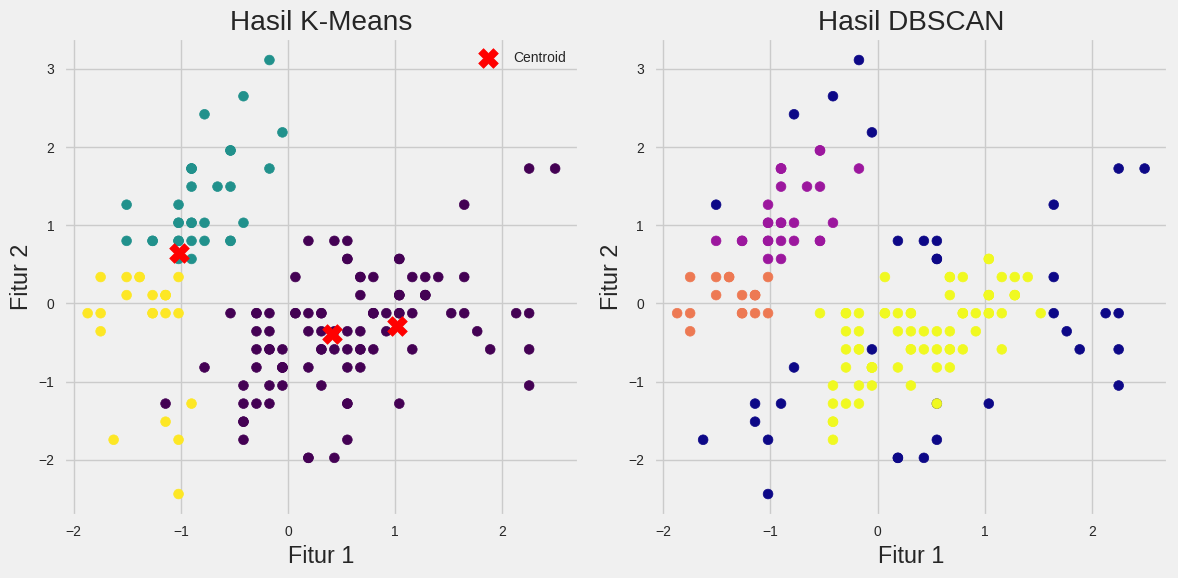

In [47]:
kmeans = KMeans(n_clusters=3)  # Sesuaikan jumlah cluster sesuai kebutuhan
kmeans.fit(data_scaled)

# Dapatkan centroid dari K-Means
centroid = kmeans.cluster_centers_

# Buat figure dengan dua subplot
plt.figure(figsize=(12, 6))

# Plot K-Means
plt.subplot(1, 2, 1)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=data['Label_K-Means'], cmap='viridis')
plt.scatter(centroid[:, 0], centroid[:, 1], s=200, c='red', marker='X', label='Centroid')
plt.title('Hasil K-Means')
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend()

# Plot DBSCAN
plt.subplot(1, 2, 2)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=data['Label_DB-Scan'], cmap='plasma')
plt.title('Hasil DBSCAN')
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')

# Tata letak dan tampilkan plot
plt.tight_layout()
plt.show()

Visualisasi menunjukkan hasil pengelompokan data menggunakan algoritma K-Means dan DBSCAN. Pada plot K-Means (kiri), data dikelompokkan menjadi beberapa cluster dengan warna berbeda, dan centroid setiap cluster ditandai dengan simbol X merah sebagai titik tengah cluster. Algoritma ini bekerja dengan meminimalkan jarak titik ke centroidnya, cocok untuk data dengan cluster berbentuk simetris. Pada plot DBSCAN (kanan), data dikelompokkan berdasarkan kepadatan, menghasilkan cluster berbentuk tidak beraturan dengan kemampuan mendeteksi noise atau outlier (titik yang tidak termasuk dalam cluster). Tidak seperti K-Means, DBSCAN tidak menggunakan centroid dan lebih fleksibel untuk data dengan variasi kepadatan.

# **Evaluasi Model Menggunakan Silhouette Score dan Davies-Bouldin Index**

In [35]:
kmeans = KMeans(n_clusters=k)

y_pred1 = kmeans.fit_predict(data_scaled)
Evaluasi_KMeans = silhouette_score(data_scaled, y_pred1)
print('Silhouette score:', Evaluasi_KMeans)

Silhouette score: 0.4209493451485674


In [39]:
# Menghitung silhouette_score algoritma db-scan
Evaluasi_DBSCAN = silhouette_score(data_scaled, y_pred2)
print('Silhouette score:', Evaluasi_DBSCAN)

Silhouette score: 0.46282227362974687


In [41]:
# Menghitung Davies-Bouldin Index (DBI) algoritma k-means
dbi_score1 = davies_bouldin_score(data_scaled, y_pred1)
print('Davies-Bouldin Index (DBI):', dbi_score1)

Davies-Bouldin Index (DBI): 0.8687591324893906


In [42]:
# Menghitung Davies-Bouldin Index (DBI) algoritma k-means
dbi_score2 = davies_bouldin_score(data_scaled, y_pred2)
print('Davies-Bouldin Index (DBI):', dbi_score2)

Davies-Bouldin Index (DBI): 1.1808250083552252


Berdasarkan hasil evaluasi, algoritma DBSCAN memiliki silhouette score yang lebih tinggi dibanding algoritma K-Means. Hal ini menunjukkan bahwa clustering yang dihasilkan oleh DBSCAN lebih baik dalam mengelompokkan data yang serupa dalam satu cluster dan data yang berbeda dalam cluster yang berbeda.

Namun, untuk Davies-Bouldin Index, algoritma K-Means memiliki nilai yang lebih rendah dibanding DBSCAN. Hal ini mengindikasikan bahwa K-Means mampu menghasilkan clustering dengan jarak rata-rata antar cluster yang lebih besar daripada DBSCAN.

Secara keseluruhan, hasil evaluasi menunjukkan bahwa kedua algoritma memiliki keunggulan dan kelemahannya masing-masing. Pemilihan algoritma yang tepat bergantung pada tujuan dan karakteristik data yang digunakan.